In [42]:
# !pip install mlxtend
# !pip install numpy scipy pandas scikit-learn
# !pip install seaborn

In [43]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
# from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.feature import hog
from skimage import color
import seaborn as sns
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [44]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\raduf\.cache\kagglehub\datasets\moltean\fruits\versions\11


In [45]:
img_size = (100, 100)  # Poți ajusta dimensiunea după necesitate
batch_size = 32

# Directorul de antrenare și testare
base_path = os.path.join(path, "fruits-360_dataset_100x100", "fruits-360")
train_dir = os.path.join(base_path, "Training")
test_dir = os.path.join(base_path, "Test")


In [46]:
# Generatoare de date
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Încărcarea imaginilor
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [47]:
X_train = np.concatenate([train_generator[i][0] for i in range(len(train_generator))], axis=0)
X_test = np.concatenate([test_generator[i][0] for i in range(len(test_generator))], axis=0)


# Obține primul lot de imagini și etichete
images, labels = train_generator[0]
class_names = list(train_generator.class_indices.keys())
# plt.figure(figsize=(20, 20))
# for i in range(len(images)):
#     plt.subplot(8, 4, i+1)
#     plt.imshow(images[i])
#     label = np.argmax(labels[i])
#     plt.title(class_names[label])
#     plt.axis('off')
# plt.show()


In [48]:
Y_train = np.concatenate([train_generator[i][1] for i in range(len(train_generator))], axis=0)
Y_test = np.concatenate([test_generator[i][1] for i in range(len(test_generator))], axis=0)

In [49]:
# print(Y_train)
# print(Y_train[1].shape)
Y_train_decimal = np.argmax(Y_train, axis=1)
Y_test_decimal = np.argmax(Y_test, axis=1)
print(Y_train_decimal)
print(Y_train_decimal.shape)

[  0   0   0 ... 140 140 140]
(70491,)


In [50]:
pca = PCA(n_components=10)


X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_train_pca = pca.fit_transform(X_train_flat)

X_test_pca = pca.transform(X_test_flat)

KeyboardInterrupt: 

In [ ]:


# Funcție pentru a aplica HOG pe un set de imagini
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Conversie în grayscale pentru HOG
        gray_img = color.rgb2gray(img)
        features, _ = hog(gray_img, orientations=6, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), block_norm='L2-Hys', visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

# Extragem atributele HOG din datele de antrenare

X_train_hog = extract_hog_features(X_train)

# Vizualizare dimensiune atribute
print(f"Dimensiunea atributelor HOG: {X_train_hog.shape}")

Dimensiunea atributelor HOG: (70491, 216)


In [ ]:
X_test_hog = extract_hog_features(X_test)

## 4.2

<Figure size 2000x800 with 0 Axes>

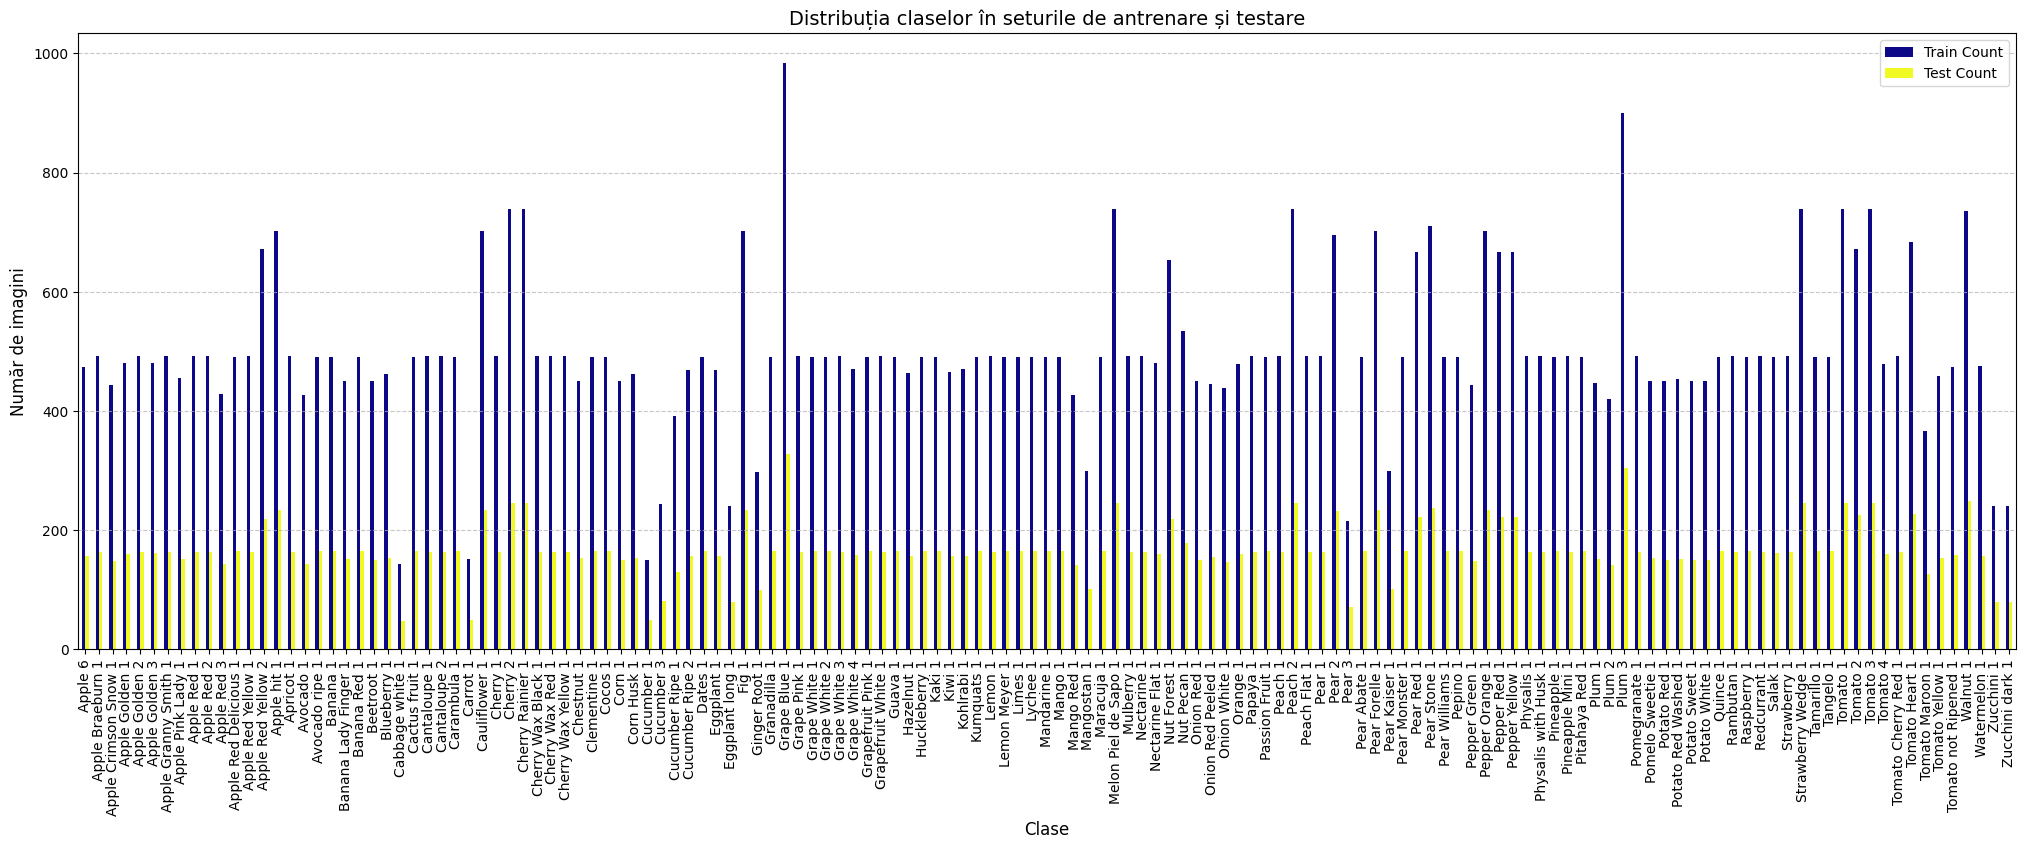

In [ ]:
labels = train_generator.classes
class_names = list(train_generator.class_indices.keys())

test_class_names = list(test_generator.class_indices.keys())
test_labels = test_generator.classes

# Creare DataFrame pentru distribuția claselor în setul de antrenare
df_train = pd.DataFrame({'Label': labels})
class_distribution_train = df_train['Label'].value_counts().sort_index()

# Creare DataFrame pentru distribuția claselor în setul de testare
df_test = pd.DataFrame({'Label': test_labels})
class_distribution_test = df_test['Label'].value_counts().sort_index()

# Combinare distribuții într-un singur DataFrame
combined_df = pd.DataFrame({
    'Class': class_names,
    'Train Count': class_distribution_train.values,
    'Test Count': class_distribution_test.values
})

# Vizualizare distribuții
plt.figure(figsize=(20, 8))
combined_df.set_index('Class').plot(kind='bar', colormap='plasma', figsize=(25, 8))
plt.xticks(rotation=90, fontsize=10)
plt.title('Distribuția claselor în seturile de antrenare și testare', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Număr de imagini', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [51]:


img_size = (100, 100)  # Înlocuiește cu dimensiunea reală a imaginilor tale

# Extragem toate imaginile din generator
# Extragem datele din generator


# Vizualizăm varianța cumulativă explicată
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Varianța cumulativă explicată de componentele principale")
plt.xlabel("Numărul de componente principale")
plt.ylabel("Varianță cumulativă explicată")
plt.grid()
plt.show()



AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

<Figure size 800x500 with 0 Axes>

In [ ]:
top_10_classes = combined_df.sort_values(by='Train Count', ascending=False).head(10)['Class'].values


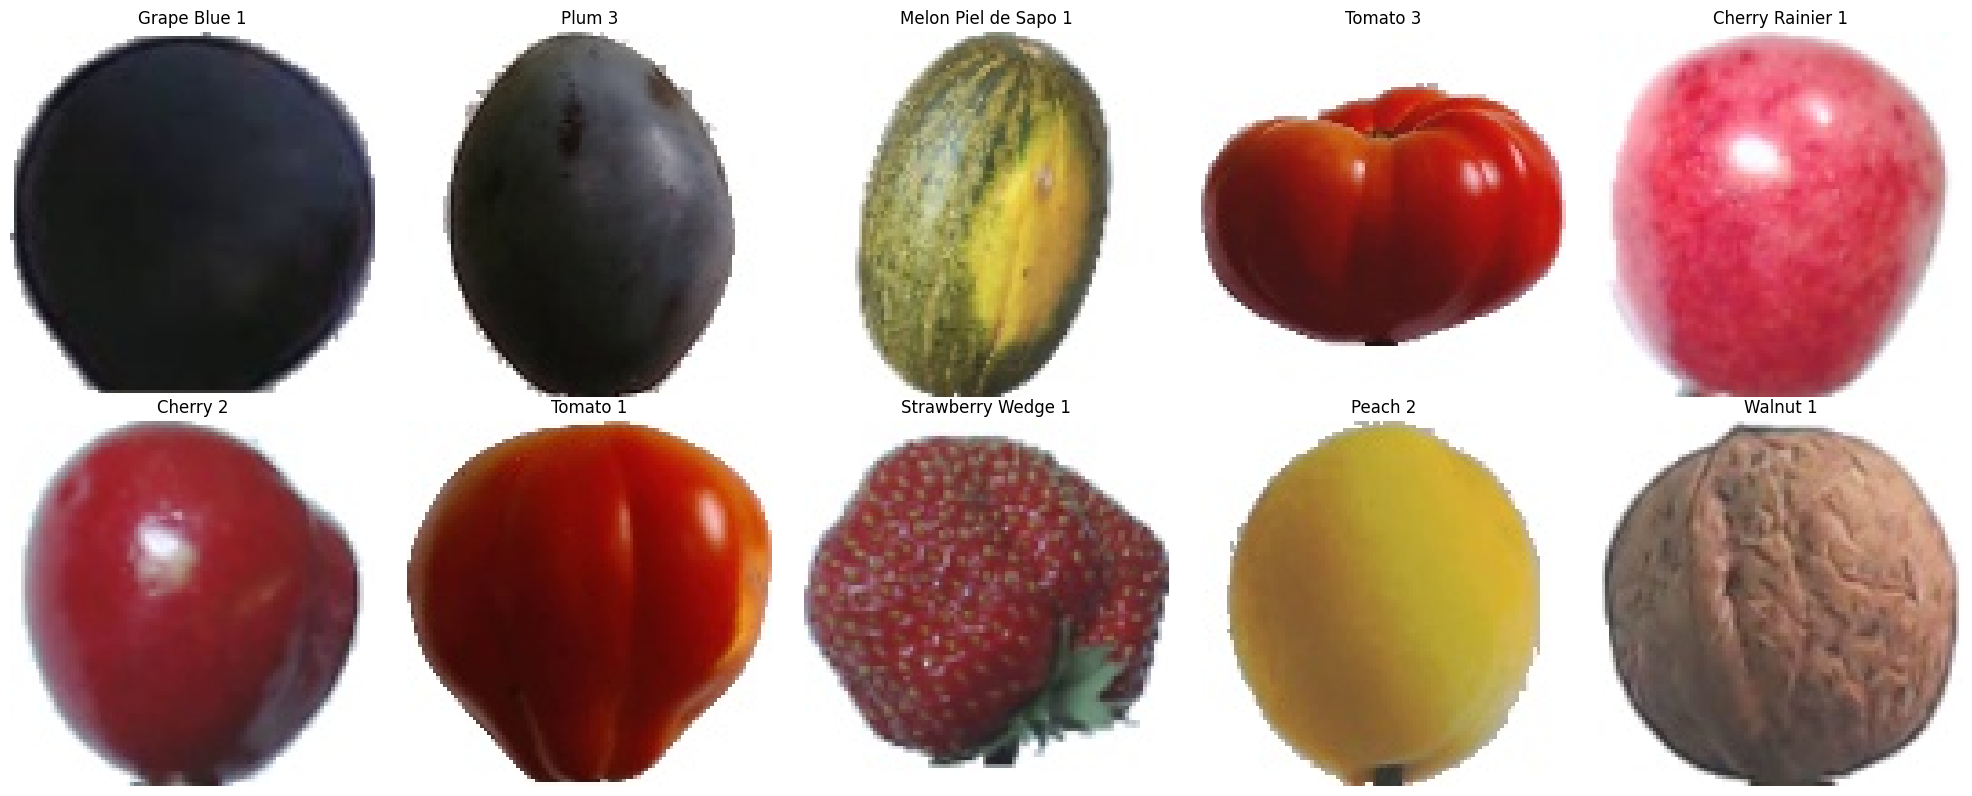

Indici imagini selectate: [(750, 19, 51), (1730, 29, 112), (1123, 3, 75), (2034, 20, 130), (485, 2, 32), (462, 0, 31), (1990, 18, 128), (1936, 28, 125), (1331, 23, 88), (2150, 1, 137)]


In [ ]:
# Selectăm primele 10 clase cele mai numeroase

# Listă pentru a salva indicii imaginilor
image_indices = []
original_images = []
# Afișăm câte o imagine din fiecare clasă
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, class_name in enumerate(top_10_classes):
    # Găsim indexul clasei
    class_index = class_names.index(class_name)
    
    # Găsim prima imagine din această clasă
    a = 0
    for batch in train_generator:
        a += 1
        images, labels = train_generator[a]
        class_indices = np.where(labels[:, class_index] == 1)[0]
        if len(class_indices) > 0:
            img = train_generator[a][0][class_indices[0]]# images[class_indices[0]] 
            image_indices.append((a, class_indices[0], class_index))
            break
      # Salvăm indexul imaginii și batch_index
    # Afișăm imaginea
    axes[i].imshow(img)
    original_images.append(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Afișăm indicii imaginilor selectate
print("Indici imagini selectate:", image_indices)


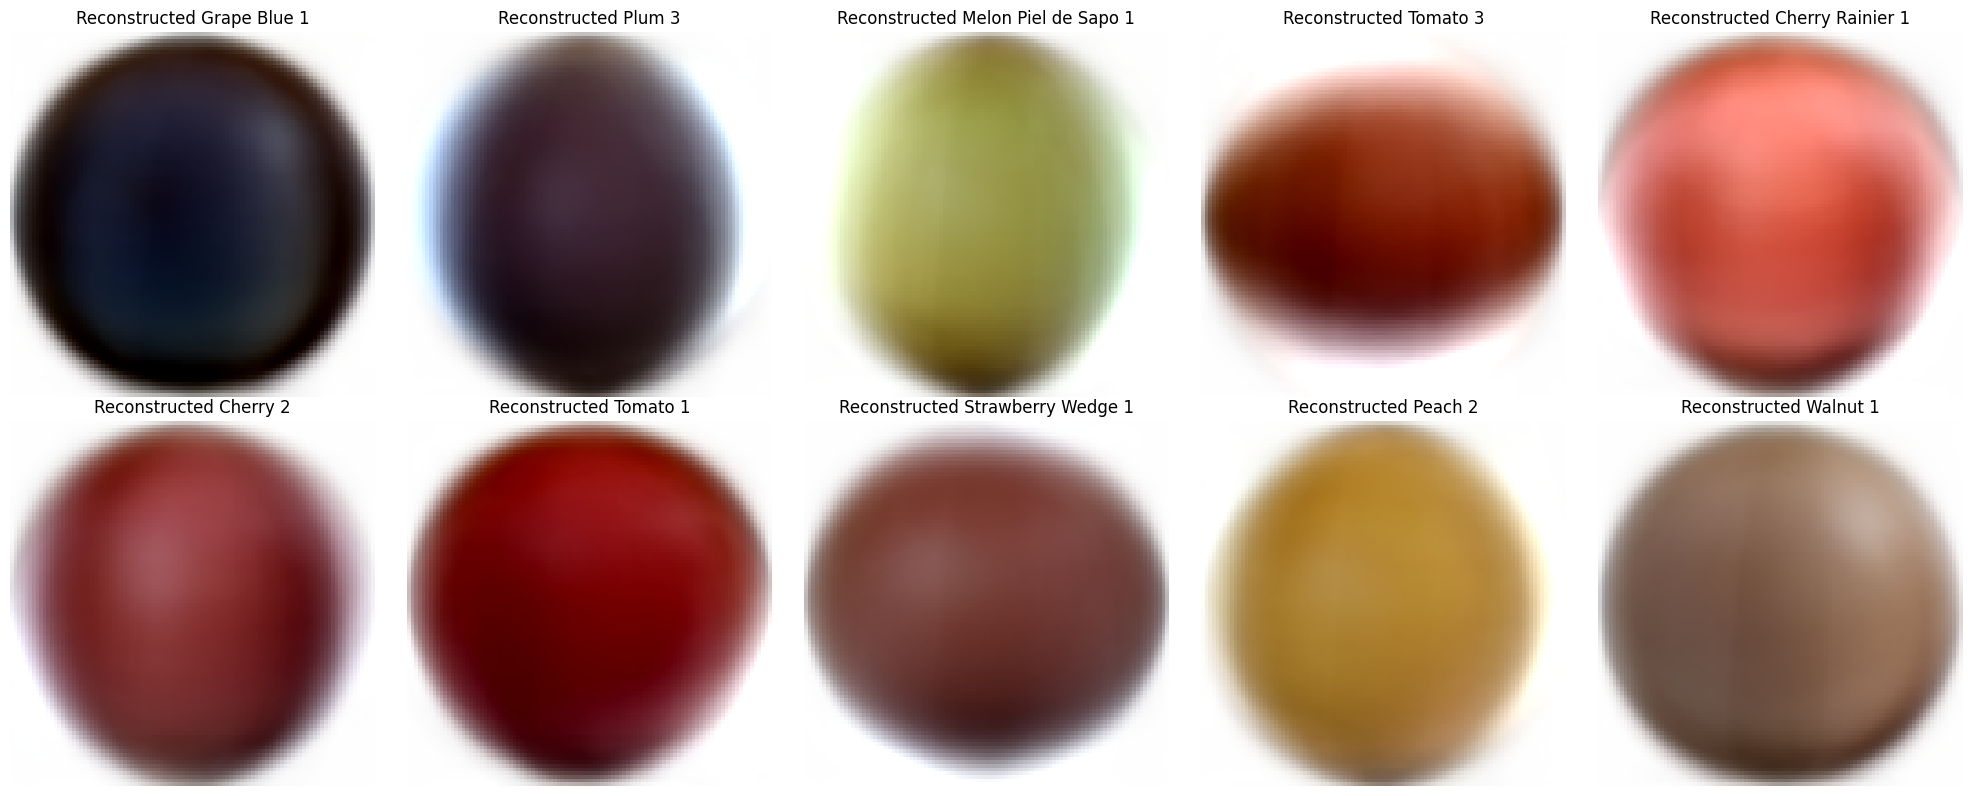

In [ ]:
# pca = PCA(n_components=32)
# X_train_flat = train_generator[1][0].reshape(-1, img_size[0] * img_size[1] * 3)
# X_train_pca = pca.fit_transform(X_train_flat)
# Extragem toate imaginile din generator
# X_train = np.concatenate([train_generator[i][0] for i in range(len(train_generator))], axis=0)


# Reconstruim imaginile din setul de antrenament folosind PCA
reconstructed_images = []
for idx in image_indices:
    # Calculăm indicele global folosind batch-ul și poziția în lot
    global_index = len(train_generator[0][0]) * idx[0] + idx[1]
    
    # Reconstruim imaginea din PCA
    img_reconstructed = pca.inverse_transform(X_train_pca[global_index]).reshape(*img_size, 3)
    reconstructed_images.append(img_reconstructed)

# Vizualizare imagini reconstruite
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, img_reconstructed in enumerate(reconstructed_images):
    # Afișăm imaginile reconstruite
    axes[i].imshow(img_reconstructed.clip(0, 1))  # Clip pentru valori valide
    axes[i].set_title(f'Reconstructed {class_names[image_indices[i][2]]}')  # Numele clasei
    axes[i].axis('off')

plt.tight_layout()
plt.show()


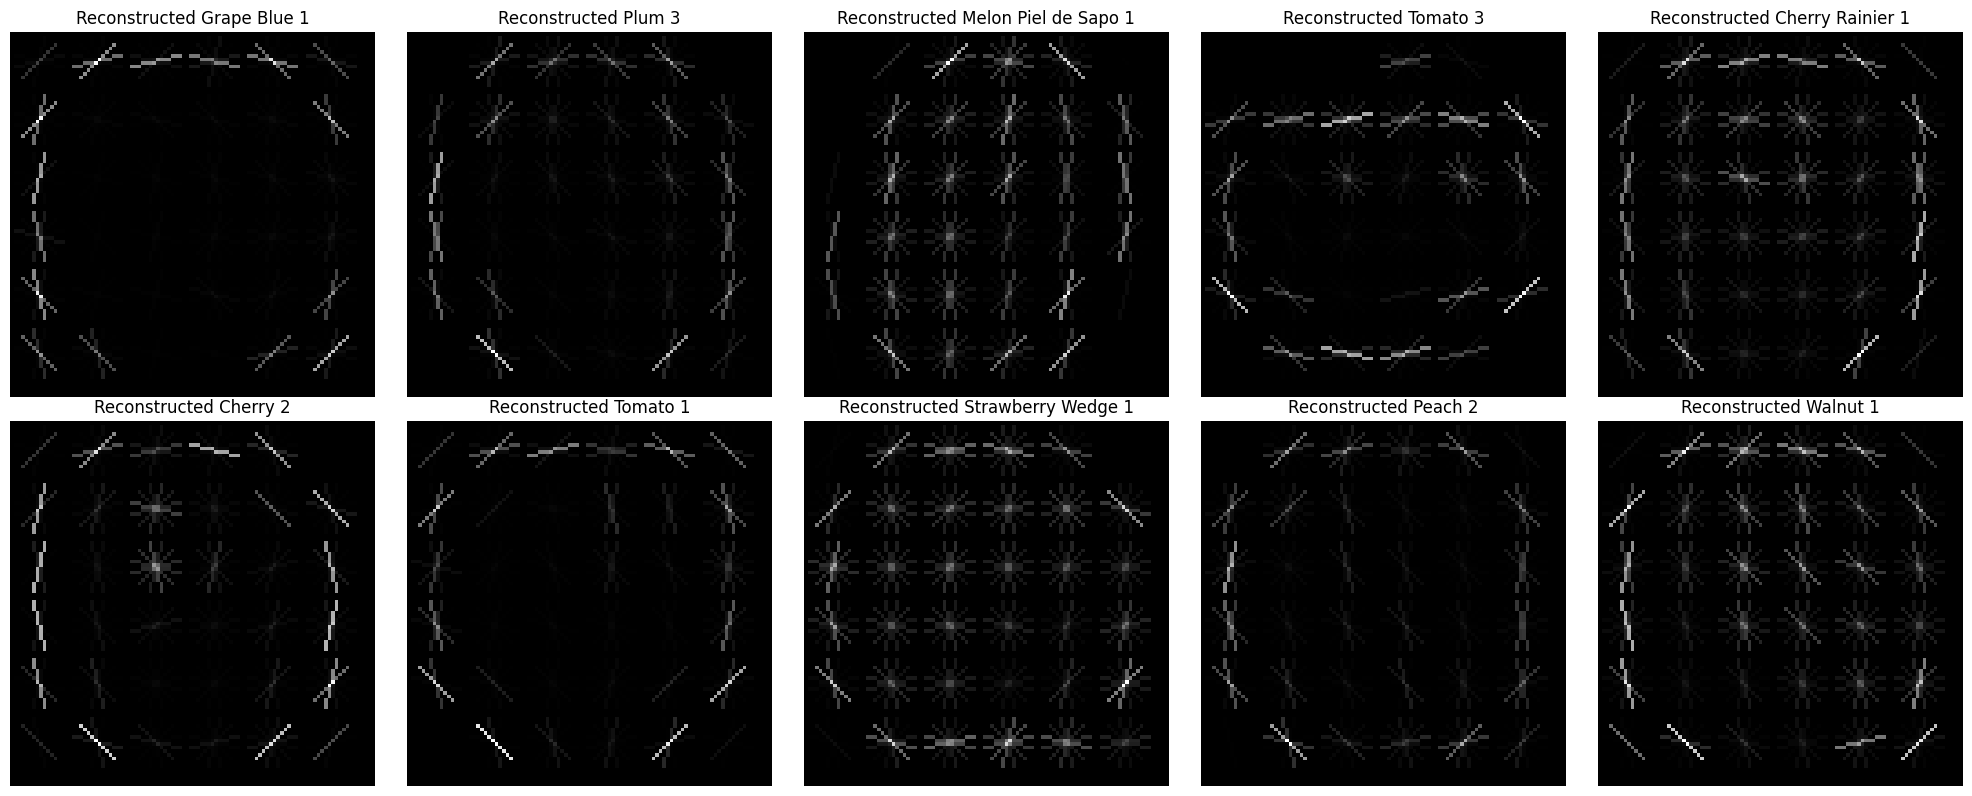

In [ ]:
# Aplicăm HOG pe toate imaginile reconstruite
hog_features_list = []
hog_images_list = []

for img in original_images:
    hog_features, hog_image = hog(color.rgb2gray(img), orientations=6, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), block_norm='L2-Hys', visualize=True)
    hog_features_list.append(hog_features)
    hog_images_list.append(hog_image)

# Vizualizare imagini HOG
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, hog_image in enumerate(hog_images_list):
    axes[i].imshow(hog_image, cmap='gray')
    axes[i].set_title(f'Reconstructed {class_names[image_indices[i][2]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif

scaler = StandardScaler()

scaler.fit(X_train_pca)

x_train_pca_standardized = scaler.transform(X_train_pca)
# print(x_train_pca.shape, x_train_pca_standardized.shape)

x_test_pca_standardized = scaler.transform(X_test_pca)
# print(x_test_pca.shape, x_test_pca_standardized.shape)


scaler_hog = StandardScaler()
x_train_hog_standardized = scaler_hog.fit_transform(X_train_hog)
x_test_hog_standardized = scaler_hog.transform(X_test_hog)

x_train_combined = np.hstack((x_train_pca_standardized, x_train_hog_standardized))
x_test_combined = np.hstack((x_test_pca_standardized, x_test_hog_standardized))

variance_threshold = VarianceThreshold(threshold=1)
x_train_variance = variance_threshold.fit_transform(x_train_combined)
x_test_variance = variance_threshold.transform(x_test_combined)

print("Dimensiuni înainte și după Variance Threshold:")
print(f"Dimensiuni train înainte: {x_train_combined.shape}, după: {x_train_variance.shape}")
print(f"Dimensiuni test înainte: {x_test_combined.shape}, după: {x_test_variance.shape}")

Dimensiuni înainte și după Variance Threshold:
Dimensiuni train înainte: (70491, 226), după: (70491, 110)
Dimensiuni test înainte: (23619, 226), după: (23619, 110)


## LogisticRegression

Cei mai buni hiper-parametri: {'multi_class': 'multinomial', 'C': 10}
Accuracy (Combined PCA + HOG): 0.7909733688979211
Classification Report (Combined PCA + HOG):
                       precision    recall  f1-score   support

              Apple 6       0.95      0.99      0.97       157
     Apple Braeburn 1       0.85      0.60      0.70       164
 Apple Crimson Snow 1       0.69      0.81      0.75       148
       Apple Golden 1       0.89      0.82      0.85       160
       Apple Golden 2       0.89      0.87      0.88       164
       Apple Golden 3       0.75      0.89      0.81       161
 Apple Granny Smith 1       0.80      0.59      0.68       164
    Apple Pink Lady 1       0.70      0.90      0.79       152
          Apple Red 1       0.79      0.64      0.71       164
          Apple Red 2       0.65      0.65      0.65       164
          Apple Red 3       0.84      0.89      0.86       144
Apple Red Delicious 1       0.77      0.84      0.80       166
   Apple Red Yel

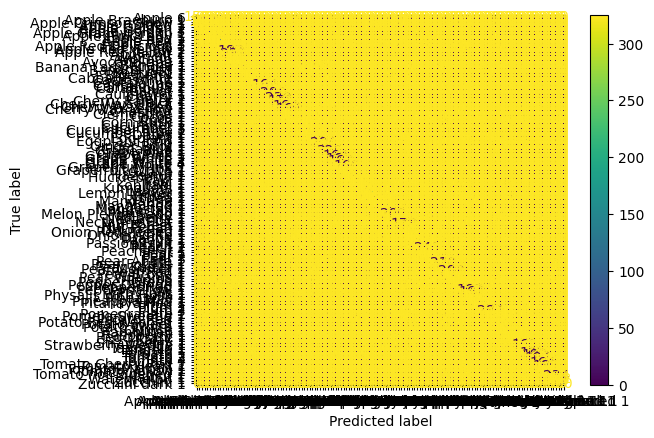

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# log_reg = LogisticRegression(max_iter=150)

# # Definirea intervalelor de hiper-parametri pentru căutare
# # param_grid = {
# #     "C": np.logspace(-2, 2, 10),#np.logspace(-4, 4, 10),  # Regularizare (valori între 10^-4 și 10^4)
# #     "multi_class": ["ovr", "multinomial"]  # Metodologia de clasificare
# # }
# param_grid = {
#     "C": [10],#np.logspace(-4, 4, 10),  # Regularizare (valori între 10^-4 și 10^4)
#     "multi_class": ["multinomial"]  # Metodologia de clasificare
# }

# random_search = RandomizedSearchCV(log_reg, param_grid, cv=5, n_iter=10, random_state=42)

# random_search.fit(x_train_variance, Y_train_decimal)

# best_model = random_search.best_estimator_
# best_params = random_search.best_params_

# y_pred_combined = best_model.predict(x_test_variance)

# accuracy_combined = accuracy_score(Y_test_decimal, y_pred_combined)
# report_combined = classification_report(Y_test_decimal, y_pred_combined, target_names=class_names)

# print(f"Cei mai buni hiper-parametri: {best_params}")
# print(f"Accuracy (Combined PCA + HOG): {accuracy_combined}")
# print("Classification Report (Combined PCA + HOG):")
# print(report_combined)

In [ ]:
# selected_classes = [class_names[idx[2]] for idx in image_indices]

# # Filtrăm etichetele și predicțiile doar pentru clasele selectate
# selected_indices = np.isin(Y_test_decimal, [idx[2] for idx in image_indices])
# filtered_y_test = Y_test_decimal[selected_indices]
# filtered_y_pred = y_pred_combined[selected_indices]

# cm_selected = confusion_matrix(filtered_y_test, filtered_y_pred, labels=[idx[2] for idx in image_indices])

# # Crearea unei vizualizări mai clare cu Seaborn
# plt.figure(figsize=(10, 10), dpi=300)
# sns.heatmap(cm_selected, annot=True, fmt='d', cmap='viridis', xticklabels=selected_classes, yticklabels=selected_classes)

# # Adăugarea etichetelor
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix for Selected Classes")
# plt.xticks(rotation=90)  # Rotire pentru lizibilitate
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()


## SVC

Cei mai buni hiper-parametri SVM: {'kernel': 'linear', 'C': 1}
Accuracy SVM (Combined PCA + HOG): 0.8573605995173378
Classification Report SVM (Combined PCA + HOG):
                       precision    recall  f1-score   support

              Apple 6       0.98      1.00      0.99       157
     Apple Braeburn 1       0.91      0.68      0.78       164
 Apple Crimson Snow 1       0.64      0.92      0.76       148
       Apple Golden 1       0.83      0.91      0.87       160
       Apple Golden 2       0.91      0.93      0.92       164
       Apple Golden 3       0.72      0.98      0.83       161
 Apple Granny Smith 1       0.86      0.63      0.73       164
    Apple Pink Lady 1       0.71      0.88      0.79       152
          Apple Red 1       0.65      0.60      0.62       164
          Apple Red 2       0.69      0.66      0.68       164
          Apple Red 3       0.71      0.82      0.76       144
Apple Red Delicious 1       0.87      0.98      0.92       166
   Apple Red Ye

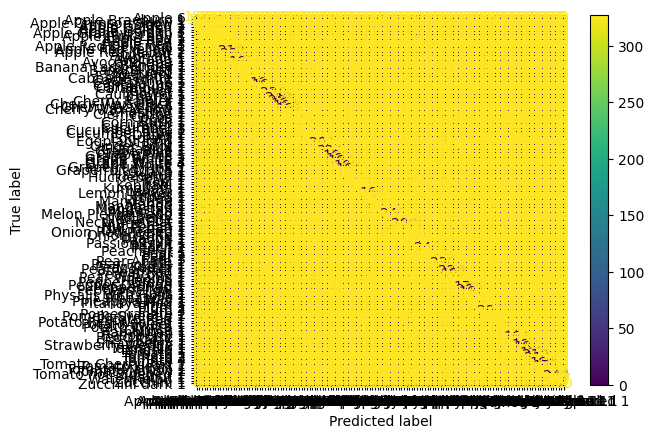

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definirea modelului SVM
svm_model = SVC()

# Definirea intervalelor de hiper-parametri pentru căutare
# param_grid_svm = {
#     "C": np.logspace(-2, 2, 5),  # Regularizare (valori între 10^-2 și 10^2)
#     "kernel": ["linear", "rbf", "poly"],  # Funcția kernel
# }

param_grid_svm = {
    "C": [1],  # Regularizare (valori între 10^-2 și 10^2)
    "kernel": ["linear"],  # Funcția kernel
}

# Configurarea RandomizedSearchCV
random_search_svm = RandomizedSearchCV(
    svm_model,
    param_distributions=param_grid_svm,
    cv=5,
    n_iter=10,  # Numărul de combinații testate
    random_state=42,
    scoring="accuracy",
    verbose=0
)

# Antrenarea și căutarea celor mai buni hiper-parametri
random_search_svm.fit(x_train_variance, Y_train_decimal)

# Cel mai bun model și hiper-parametrii săi
best_svm_model = random_search_svm.best_estimator_
best_svm_params = random_search_svm.best_params_

# Predicția pe setul de testare
y_pred_svm = best_svm_model.predict(x_test_variance)

# Evaluarea performanței
accuracy_svm = accuracy_score(Y_test_decimal, y_pred_svm)
report_svm = classification_report(Y_test_decimal, y_pred_svm, target_names=class_names)

# Afișarea rezultatelor
print(f"Cei mai buni hiper-parametri SVM: {best_svm_params}")
print(f"Accuracy SVM (Combined PCA + HOG): {accuracy_svm}")
print("Classification Report SVM (Combined PCA + HOG):")
print(report_svm)

# Vizualizarea matricii de confuzie
ConfusionMatrixDisplay.from_estimator(best_svm_model, x_test_variance, Y_test_decimal, display_labels=class_names)


## RandomForestClassifier

Cei mai buni hiper-parametri Random Forest: {'n_estimators': 200, 'max_samples': 1.0, 'max_depth': None}
Accuracy Random Forest (Combined PCA + HOG): 0.8693001397180237
Classification Report Random Forest:
                       precision    recall  f1-score   support

              Apple 6       0.82      1.00      0.90       157
     Apple Braeburn 1       0.90      0.72      0.80       164
 Apple Crimson Snow 1       0.80      0.95      0.87       148
       Apple Golden 1       0.94      0.97      0.96       160
       Apple Golden 2       0.81      0.93      0.86       164
       Apple Golden 3       0.66      1.00      0.79       161
 Apple Granny Smith 1       0.90      0.75      0.82       164
    Apple Pink Lady 1       0.89      0.78      0.83       152
          Apple Red 1       0.93      0.71      0.81       164
          Apple Red 2       0.86      0.73      0.79       164
          Apple Red 3       0.72      0.94      0.81       144
Apple Red Delicious 1       0.96     

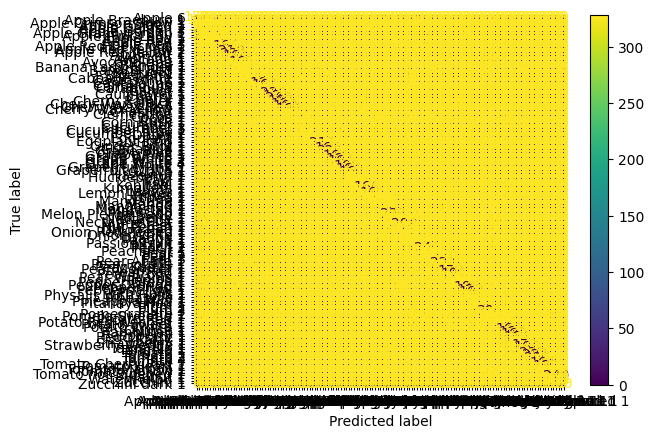

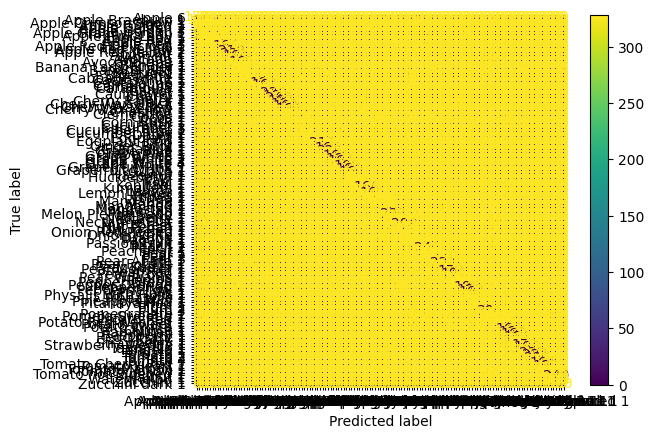

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score



# rf_model = RandomForestClassifier(random_state=42)

# param_grid_rf = {
#     'n_estimators': [50, 100, 200],  # Numărul de arbori
#     'max_depth': [10, 20, 30, None],  # Adâncimea maximă a unui arbore
#     'max_samples': [0.5, 0.75, 1.0]  # Procentul din input folosit
# }

# # Configurarea RandomizedSearchCV
# random_search_rf = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=param_grid_rf,
#     n_iter=10,
#     scoring="accuracy",
#     cv=5,
#     verbose=0,
#     random_state=42
#     # n_jobs= 2  # Utilizează toate nucleele disponibile
# )

# # Antrenarea și căutarea celor mai buni hiper-parametri
# random_search_rf.fit(x_train_variance, Y_train_decimal)

# # Cel mai bun model și hiper-parametrii săi
# best_rf_model = random_search_rf.best_estimator_
# best_rf_params = random_search_rf.best_params_

# # Predicția pe setul de testare combinat
# y_pred_rf = best_rf_model.predict(x_test_variance)

# # Evaluarea performanței
# accuracy_rf = accuracy_score(Y_test_decimal, y_pred_rf)
# report_rf = classification_report(Y_test_decimal, y_pred_rf, target_names=class_names)

# print(f"Cei mai buni hiper-parametri Random Forest: {best_rf_params}")
# print(f"Accuracy Random Forest (Combined PCA + HOG): {accuracy_rf}")
# print("Classification Report Random Forest:")
# print(report_rf)


In [36]:
# # Extragem clasele din image_indices
# selected_classes = [class_names[idx[2]] for idx in image_indices]

# # Filtrăm etichetele și predicțiile doar pentru clasele selectate
# selected_indices = np.isin(Y_test_decimal, [idx[2] for idx in image_indices])
# filtered_y_test = Y_test_decimal[selected_indices]
# filtered_y_pred = y_pred_rf[selected_indices]

# # Calculăm matricea de confuzie pentru clasele selectate
# cm_selected = confusion_matrix(filtered_y_test, filtered_y_pred, labels=[idx[2] for idx in image_indices])

# # Crearea unei vizualizări mai clare cu Seaborn
# plt.figure(figsize=(10, 10), dpi=300)
# sns.heatmap(cm_selected, annot=True, fmt='d', cmap='viridis', xticklabels=selected_classes, yticklabels=selected_classes)

# # Adăugarea etichetelor
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix for Selected Classes")
# plt.xticks(rotation=90)  # Rotire pentru lizibilitate
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()


## 

In [ ]:
# from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier

# # Definirea modelului XGBClassifier
# xgb_model = XGBClassifier(random_state=42, eval_metric="logloss", tree_method="hist", device="cuda")

# # Definirea intervalelor de hiper-parametri pentru XGBClassifier
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],  # Numărul de arbori
#     'max_depth': [3, 6, 10],         # Adâncimea maximă a unui arbore
#     'learning_rate': [0.01, 0.1, 0.2],  # Rata de învățare
#     'subsample': [0.5, 0.75, 1.0],      # Procentul de eșantionare
#     'colsample_bytree': [0.5, 0.75, 1.0]  # Procentul de eșantionare pe caracteristici
# }

# # Configurarea RandomizedSearchCV
# random_search_xgb = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid_xgb,
#     n_iter=10,  # Numărul de combinații de hiper-parametri de încercat
#     scoring="accuracy",
#     cv=5,  # Cross-validation pe 5 fold-uri
#     verbose=0,
#     random_state=42
# )

# # Antrenarea și căutarea celor mai buni hiper-parametri
# random_search_xgb.fit(X_train, Y_train_decimal)

# # Cel mai bun model și hiper-parametrii săi
# best_xgb_model = random_search_xgb.best_estimator_
# best_xgb_params = random_search_xgb.best_params_

# # Predicția pe setul de testare
# y_pred_xgb = best_xgb_model.predict(X_test)

# # Evaluarea performanței
# accuracy_xgb = accuracy_score(Y_test_decimal, y_pred_xgb)
# report_xgb = classification_report(Y_test_decimal, y_pred_xgb, target_names=class_names)

# # Afișarea rezultatelor
# print(f"Cei mai buni hiper-parametri XGBClassifier: {best_xgb_params}")
# print(f"Accuracy XGBClassifier: {accuracy_xgb}")
# print("Classification Report XGBClassifier:")
# print(report_xgb)

# # Vizualizarea matricii de confuzie
# ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test, Y_test_decimal, display_labels=class_names).plot()


KeyboardInterrupt: 